In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.io as pio
from plotly.subplots import make_subplots
import ipywidgets as widgets
from ipywidgets import interactive
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
pd.options.mode.chained_assignment = None
from datetime import datetime, timedelta
import matplotlib.dates as mdates

#Đọc và hiển thị thông tin dữ liệu

In [3]:
df = pd.read_csv('/content/drive/MyDrive/KLTN/time-series-data/crypto-markets-data.csv')
df.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0,1500520000,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0,1491160000,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0,1597780000,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0,1542820000,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0,1292190000,0.3881,33.32


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679183 entries, 0 to 679182
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   slug         679183 non-null  object 
 1   symbol       679183 non-null  object 
 2   name         679183 non-null  object 
 3   date         679183 non-null  object 
 4   ranknow      679183 non-null  int64  
 5   open         679183 non-null  float64
 6   high         679183 non-null  float64
 7   low          679183 non-null  float64
 8   close        679183 non-null  float64
 9   volume       679183 non-null  int64  
 10  market       679183 non-null  int64  
 11  close_ratio  665926 non-null  float64
 12  spread       679183 non-null  float64
dtypes: float64(6), int64(3), object(4)
memory usage: 67.4+ MB


In [5]:
btc=df[df['symbol']=='BTC']
btc['date'] = pd.to_datetime(btc['date'])
btc.set_index('date', inplace=True)
btc.head()

,slug,symbol,name,ranknow,open,high,low,close,volume,market,close_ratio,spread
date,,,,,,,,,,,,
2013-04-28,bitcoin,BTC,Bitcoin,1,135.30,135.98,132.10,134.21,0,1500520000,0.5438,3.88
2013-04-29,bitcoin,BTC,Bitcoin,1,134.44,147.49,134.00,144.54,0,1491160000,0.7813,13.49
2013-04-30,bitcoin,BTC,Bitcoin,1,144.00,146.93,134.05,139.00,0,1597780000,0.3843,12.88
2013-05-01,bitcoin,BTC,Bitcoin,1,139.00,139.89,107.72,116.99,0,1542820000,0.2882,32.17
2013-05-02,bitcoin,BTC,Bitcoin,1,116.38,125.60,92.28,105.21,0,1292190000,0.3881,33.32


In [6]:
columns_to_keep = ['close','open', 'high', 'low']
btc = btc[columns_to_keep]

In [7]:
btc.head()

,close,open,high,low
date,,,,
2013-04-28,134.21,135.30,135.98,132.10
2013-04-29,144.54,134.44,147.49,134.00
2013-04-30,139.00,144.00,146.93,134.05
2013-05-01,116.99,139.00,139.89,107.72
2013-05-02,105.21,116.38,125.60,92.28


In [8]:
btc.describe()

,close,open,high,low
count,1745.000000,1745.000000,1745.000000,1745.000000
mean,1417.806115,1414.091759,1467.029616,1354.985954
std,2877.000892,2874.565707,3010.144643,2704.371429
min,68.430000,68.500000,74.560000,65.530000
25%,274.020000,273.500000,278.340000,267.090000
50%,477.760000,477.760000,489.830000,465.130000
75%,842.720000,841.470000,870.960000,820.270000
max,19497.400000,19475.800000,20089.000000,18974.100000


In [9]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1745 entries, 2013-04-28 to 2018-02-05
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   1745 non-null   float64
 1   open    1745 non-null   float64
 2   high    1745 non-null   float64
 3   low     1745 non-null   float64
dtypes: float64(4)
memory usage: 68.2 KB


#Xử lý dữ liệu null

In [10]:
btc.isnull().sum()

,0
close,0
open,0
high,0
low,0


#Biểu đồ đường

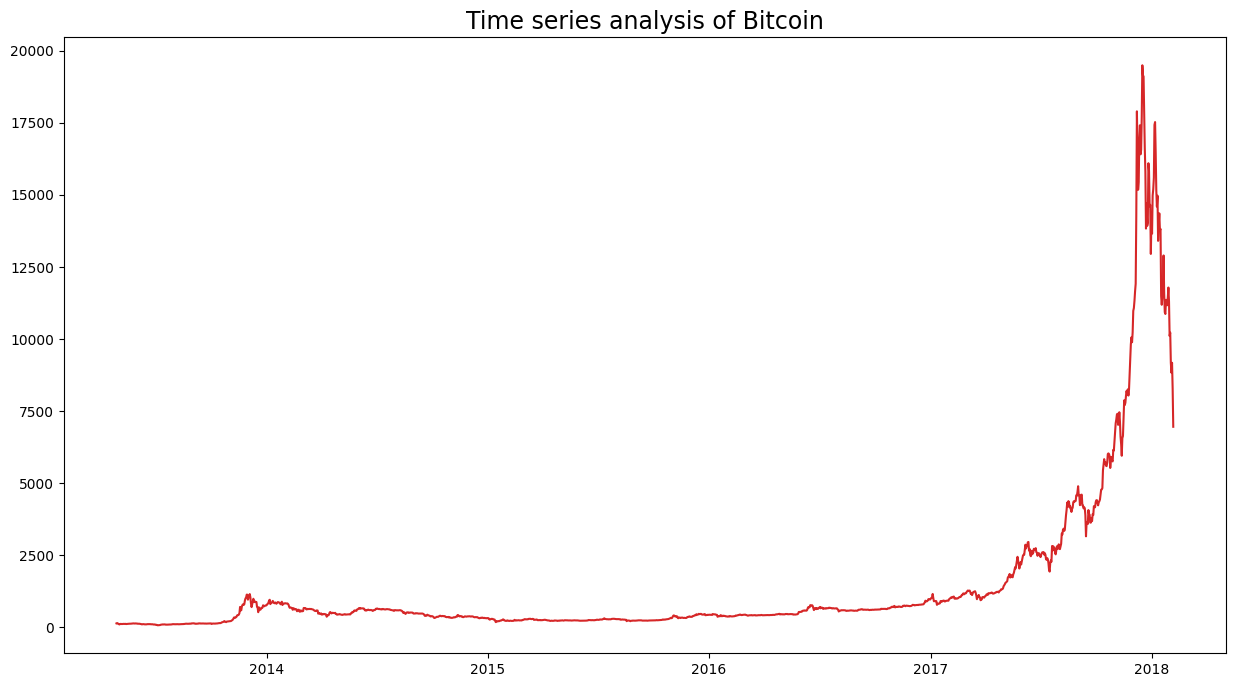

In [11]:
plt.figure(figsize= (15,8))
plt.plot(btc.index, btc['close'],
color='tab:red')
plt.title("Time series analysis of Bitcoin",fontsize = 17)
plt.ticklabel_format(style='plain', axis='y')

#Biểu đồ hộp

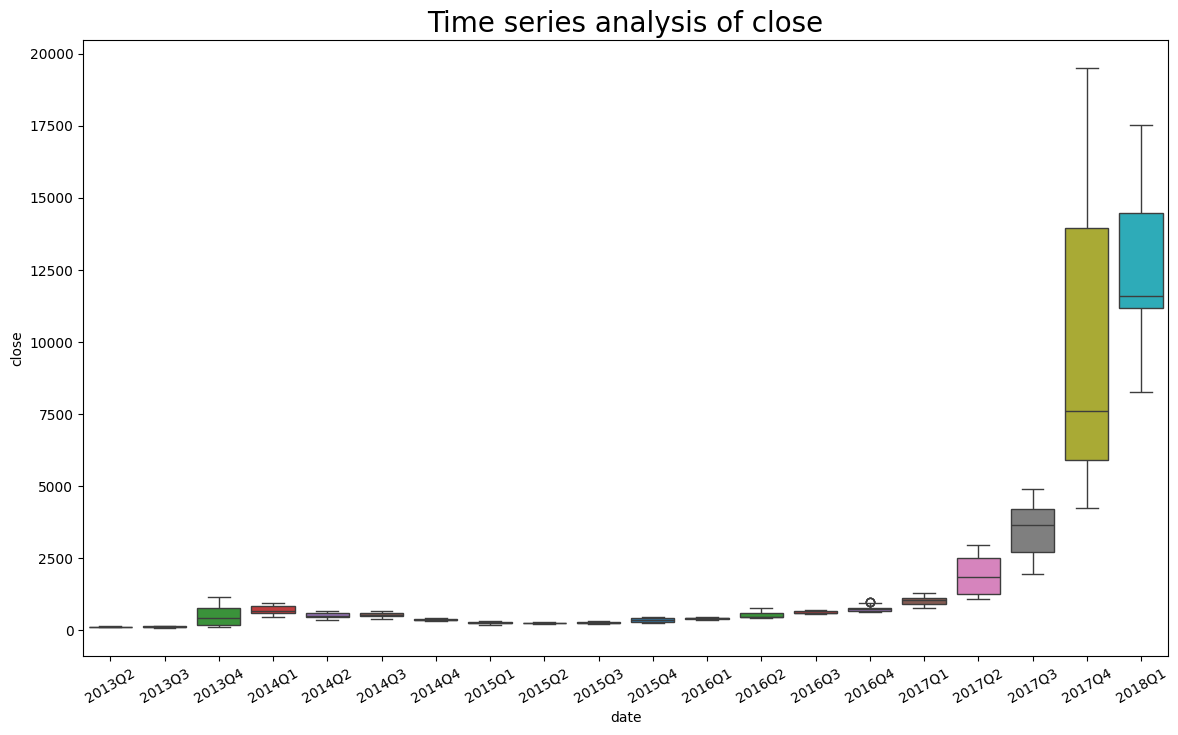

In [12]:
plt.figure(figsize=(14, 8))
data_subset = btc[btc.index < '2018-02-05']
ax = sns.boxplot(data=data_subset,
                 x=pd.PeriodIndex(data_subset.index, freq='Q'),
                 y=data_subset['close'],
                 hue=pd.PeriodIndex(data_subset.index, freq='Q'), palette='tab10', legend=False)
ax.set_title("Time series analysis of close", fontsize=20)
plt.xticks(rotation=30)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

#Biểu đồ phân rã

In [13]:
def plot_seasonal_decomposition(start_idx, end_idx):
    decomposition_multi = seasonal_decompose(btc['close'], model='multiplicative', period=365)

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 8), sharex=True)

    decomposition_multi.observed[start_idx:end_idx].plot(ax=ax1)
    ax1.set_ylabel('Observed')
    decomposition_multi.trend[start_idx:end_idx].plot(ax=ax2)
    ax2.set_ylabel('Trend')
    decomposition_multi.seasonal[start_idx:end_idx].plot(ax=ax3)
    ax3.set_ylabel('Seasonal')
    ax4.scatter(decomposition_multi.resid[start_idx:end_idx].index, decomposition_multi.resid[start_idx:end_idx], marker='o', s=10)
    ax4.set_ylabel('Residual')

    plt.xticks(rotation=45)
    plt.show()

interactive_plot = interactive(plot_seasonal_decomposition,
                               start_idx=widgets.IntSlider(min=0, max=len(btc)-1, step=1, value=0, description='Start'),
                               end_idx=widgets.IntSlider(min=0, max=len(btc)-1, step=1, value=len(btc)-1, description='End'))
interactive_plot

interactive(children=(IntSlider(value=0, description='Start', max=1744), IntSlider(value=1744, description='En…

#Kiểm tra tính dừng

In [14]:
adf_result = adfuller(btc['close'], autolag='AIC')
print('ADF Test Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
print(adf_result[4])
if adf_result[0] < adf_result[4]["5%"]:
  print("Reject Null Hypothesis - Time Series is Stationary")
else:
  print("Failed to Reject Null Hypothesis - Time Series is Non-Stationary")

ADF Test Statistic: -4.193708
p-value: 0.000675
Critical Values:
{'1%': -3.4341598265624627, '5%': -2.863222825253062, '10%': -2.567665889522738}
Reject Null Hypothesis - Time Series is Stationary


#Moving Average

In [15]:
btc['MA10'] = btc['close'].rolling(window=10).mean()

In [16]:
btc.dropna(inplace=True)

In [17]:
btc.isnull().sum()

,0
close,0
open,0
high,0
low,0
MA10,0


In [18]:
btc.head()

,close,open,high,low,MA10
date,,,,,
2013-05-07,111.50,112.25,113.44,97.70,118.991
2013-05-08,113.57,109.60,115.78,109.60,116.927
2013-05-09,112.67,113.20,113.46,109.26,113.740
2013-05-10,117.20,112.80,122.00,111.55,111.560
2013-05-11,115.24,117.70,118.68,113.01,111.385


#Feature Scaling

In [19]:
features = ['close', 'MA10']
data = btc[features].values

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [21]:
data_scaled

array([[0.00221679, 0.00227007],
       [0.00232333, 0.00215306],
       [0.00227701, 0.00197239],
       ...,
       [0.46870627, 0.58770381],
       [0.42249177, 0.57079641],
       [0.35446243, 0.54689484]])

#Chuẩn bị dữ liệu

In [22]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), :])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

#Mô hình LSTM

In [23]:
from math import sqrt
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

In [24]:
def train_lstm(seq_length, X_train, y_train, X_test, y_test, model_path):
    model = Sequential()
    model.add(Input(shape=(seq_length, X_train.shape[2])))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(25))
    model.add(Dense(1))
    model.summary()

    checkpoint = ModelCheckpoint(
        model_path,
        monitor='val_loss',
        save_best_only=True,
        mode='min',
        verbose=0
    )

    model.compile(optimizer='adam', loss='mean_squared_error')

    history = model.fit(
        X_train, y_train, validation_split=0.2,
        epochs=50, batch_size=32, callbacks=[checkpoint], verbose=0
    )

    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title(f"Model Loss for Sequence Length {seq_length}")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

    best_model = load_model(model_path)
    y_pred = best_model.predict(X_test)

    return y_pred


Training model with sequence length: 7
1383 train examples
346 test examples


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 7, 50)               │          10,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,101 (125.39 KB)

 Trainable params: 32,101 (125.39 KB)

 Non-trainable params: 0 (0.00 B)

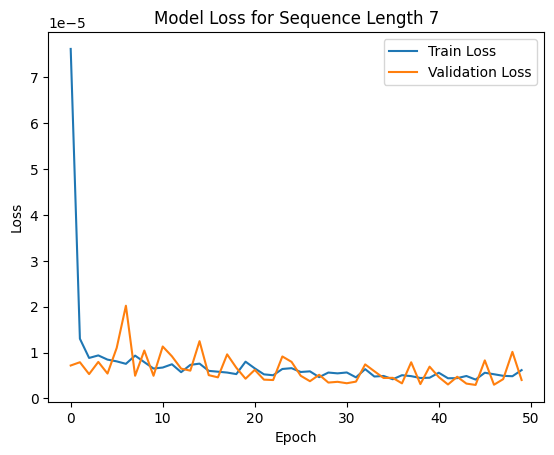

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step

Metrics for sequence length 7:
MSE: 497222.87
RMSE: 705.14
R2: 0.98
MAE: 360.03

Training model with sequence length: 10
1380 train examples
346 test examples


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 10, 50)              │          10,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,101 (125.39 KB)

 Trainable params: 32,101 (125.39 KB)

 Non-trainable params: 0 (0.00 B)

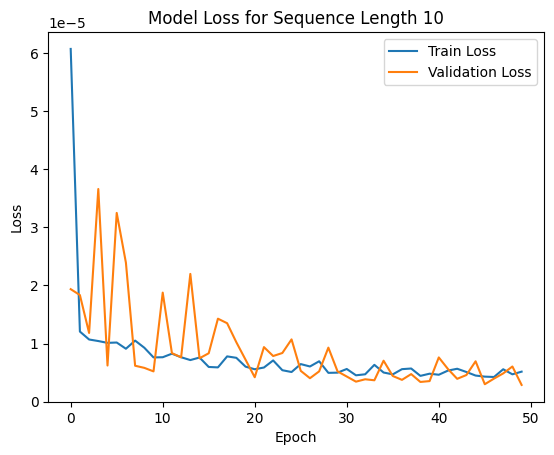

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step

Metrics for sequence length 10:
MSE: 551990.38
RMSE: 742.96
R2: 0.97
MAE: 382.77

Training model with sequence length: 14
1377 train examples
345 test examples


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 14, 50)              │          10,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 14, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,101 (125.39 KB)

 Trainable params: 32,101 (125.39 KB)

 Non-trainable params: 0 (0.00 B)

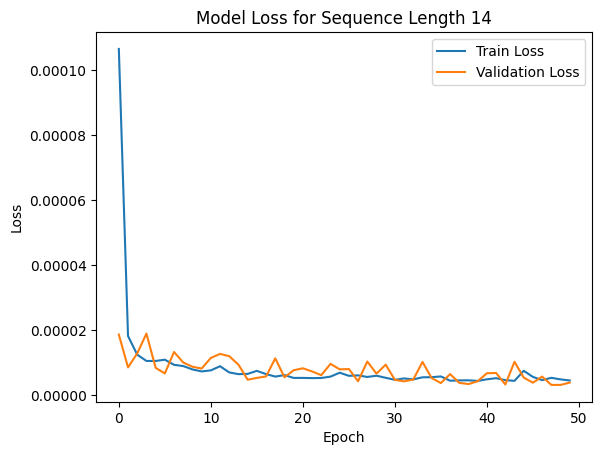

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step

Metrics for sequence length 14:
MSE: 592775.53
RMSE: 769.92
R2: 0.97
MAE: 397.63

Training model with sequence length: 21
1372 train examples
343 test examples


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 21, 50)              │          10,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 21, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,101 (125.39 KB)

 Trainable params: 32,101 (125.39 KB)

 Non-trainable params: 0 (0.00 B)

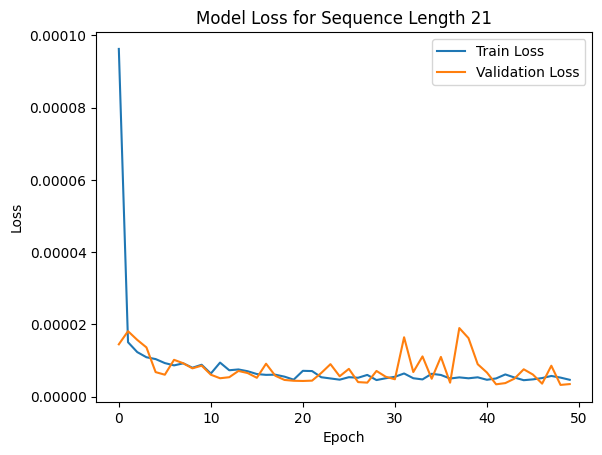

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step

Metrics for sequence length 21:
MSE: 558892.63
RMSE: 747.59
R2: 0.97
MAE: 392.85

Training model with sequence length: 30
1364 train examples
342 test examples


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 30, 50)              │          10,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,101 (125.39 KB)

 Trainable params: 32,101 (125.39 KB)

 Non-trainable params: 0 (0.00 B)

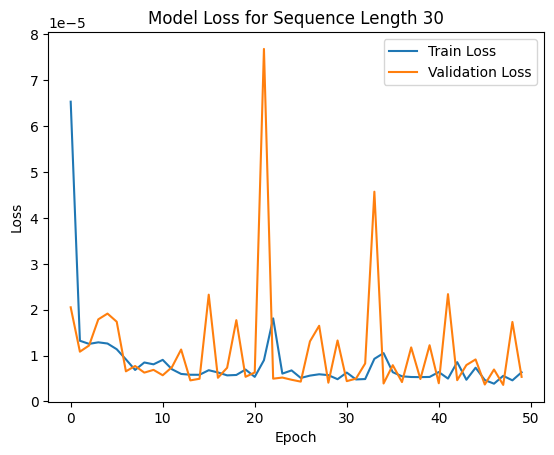

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step

Metrics for sequence length 30:
MSE: 775047.18
RMSE: 880.37
R2: 0.96
MAE: 471.32

Training model with sequence length: 60
1340 train examples
336 test examples


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                       │ (None, 60, 50)              │          10,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,101 (125.39 KB)

 Trainable params: 32,101 (125.39 KB)

 Non-trainable params: 0 (0.00 B)

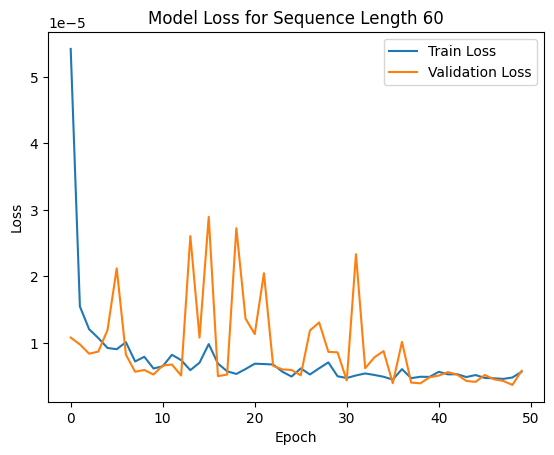

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step

Metrics for sequence length 60:
MSE: 618764.81
RMSE: 786.62
R2: 0.97
MAE: 423.80

Training model with sequence length: 90
1316 train examples
330 test examples


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 90, 50)              │          10,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 90, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,101 (125.39 KB)

 Trainable params: 32,101 (125.39 KB)

 Non-trainable params: 0 (0.00 B)

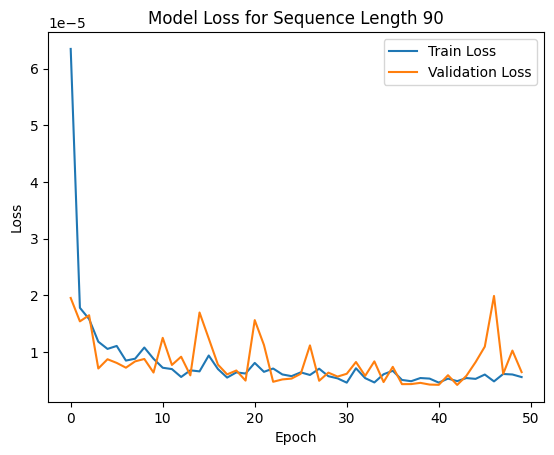

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step

Metrics for sequence length 90:
MSE: 694336.17
RMSE: 833.27
R2: 0.97
MAE: 460.12


In [25]:
best_seq_length = None
best_model_path = None
best_metrics = {'mse': float('inf'), 'rmse': float('inf'), 'r2': -float('inf'), 'mae': float('inf')}
best_y_pred_inv = None
best_y_test_inv = None

seq_lengths = [7, 10 ,14, 21, 30, 60, 90]
for seq_length in seq_lengths:
    X, y = create_sequences(data_scaled, seq_length)

    # training and test sets
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    print(f"\nTraining model with sequence length: {seq_length}")
    print(f"{X_train.shape[0]} train examples")
    print(f"{X_test.shape[0]} test examples")

    # Train model
    model_path = f'/content/drive/MyDrive/KLTN/time-series-data/best_model_{seq_length}.h5.keras'
    y_pred = train_lstm(seq_length, X_train, y_train, X_test, y_test, model_path)

    y_test_inv = scaler.inverse_transform(np.hstack([y_test.reshape(-1, 1), np.zeros((len(y_test), X_train.shape[2] - 1))]))[:, 0]
    y_pred_inv = scaler.inverse_transform(np.hstack([y_pred, np.zeros((len(y_pred), X_train.shape[2] - 1))]))[:, 0]

    #Các độ đo đánh giá mô hình
    mse = mean_squared_error(y_test_inv, y_pred_inv)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_inv, y_pred_inv)
    mae = mean_absolute_error(y_test_inv, y_pred_inv)

    print(f'\nMetrics for sequence length {seq_length}:')
    print(f'MSE: {mse:.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f'R2: {r2:.2f}')
    print(f'MAE: {mae:.2f}')
    if rmse < best_metrics['rmse']:
        best_seq_length = seq_length
        best_model_path = model_path
        best_metrics = {'mse': mse, 'rmse': rmse, 'r2': r2, 'mae': mae}
        best_y_pred_inv = y_pred_inv
        best_y_test_inv = y_test_inv

In [29]:
best_seq_length

7

In [30]:
best_metrics

{'mse': 497222.86753451417,
 'rmse': 705.1403176209074,
 'r2': 0.9774456001807436,
 'mae': 360.02772113317036}

#Dự đoán giá bitcoin trong 30 ngày tiếp theo

In [26]:
best_model = load_model(best_model_path)

In [27]:
# Dự báo giá Bitcoin cho 30 ngày tiếp theo
seq_length = best_seq_length
last_sequence = data_scaled[-seq_length:]
next_30_days = []

for _ in range(30):
    next_pred = best_model.predict(last_sequence.reshape(1, seq_length, len(features)))
    next_30_days.append(next_pred[0, 0])
    last_sequence = np.roll(last_sequence, -1, axis=0)
    last_sequence[-1] = np.hstack([next_pred[0], last_sequence[-2, 1:]])

next_30_days_prices = scaler.inverse_transform(np.hstack([np.array(next_30_days).reshape(-1, 1), np.zeros((30, len(features)-1))]))[:, 0]

# Tạo ngày cho 30 ngày tiếp theo
last_date = btc.index[-1]
next_30_days_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

print("\nDự báo giá Bitcoin cho 30 ngày tiếp theo:")
for date, price in zip(next_30_days_dates, next_30_days_prices):
    print(f"{date.date()}: ${price:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━

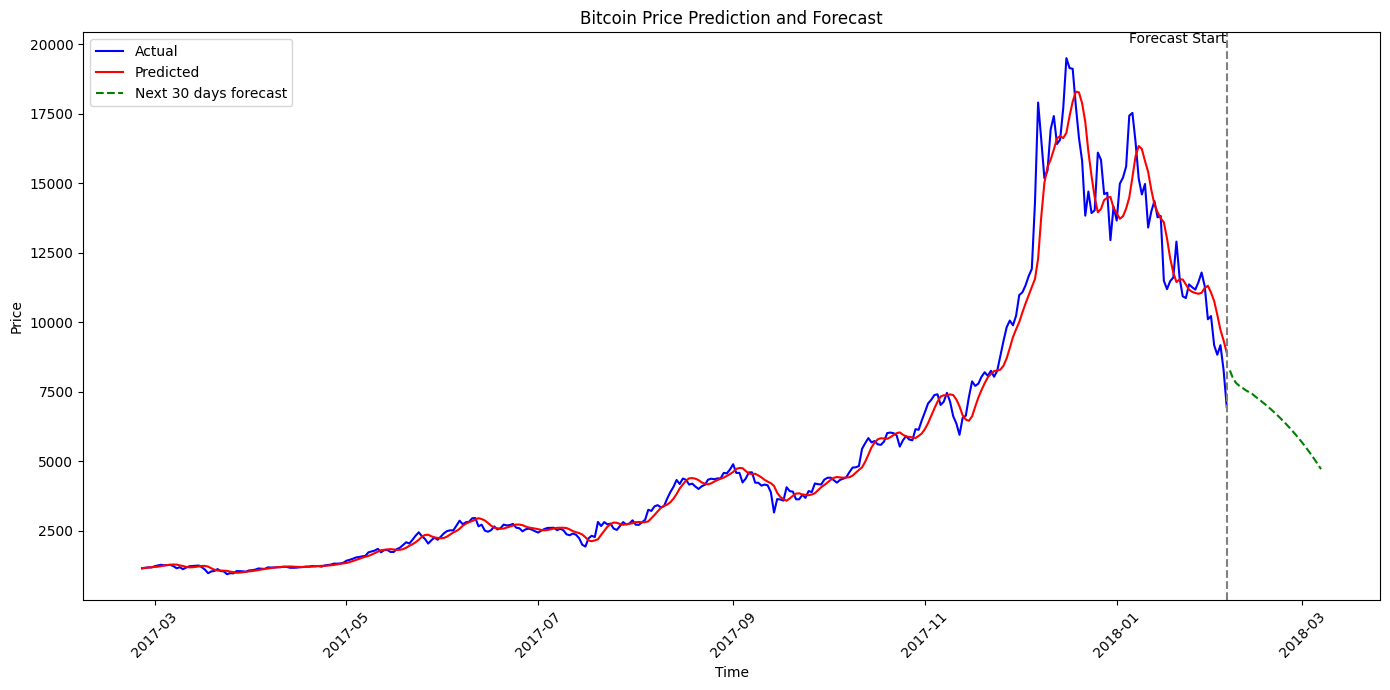

In [28]:
# Vẽ biểu đồ so sánh kết quả dự đoán, thực tế và dự báo 30 ngày tiếp theo
plt.figure(figsize=(14, 7))

# Vẽ giá trị thực tế và dự đoán
plt.plot(btc.index[-len(best_y_test_inv):], best_y_test_inv, label='Actual', color='blue')
plt.plot(btc.index[-len(best_y_pred_inv):], best_y_pred_inv, label='Predicted', color='red')

# Vẽ dự báo 30 ngày tiếp theo
plt.plot(next_30_days_dates, next_30_days_prices, label='Next 30 days forecast', color='green', linestyle='--')

plt.legend()
plt.title('Bitcoin Price Prediction and Forecast')
plt.xlabel('Time')
plt.ylabel('Price')

# Đánh dấu điểm bắt đầu dự báo
plt.axvline(x=btc.index[-1], color='gray', linestyle='--')
plt.text(btc.index[-1], plt.ylim()[1], 'Forecast Start', ha='right', va='top')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()